In [55]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from time import time
import re
import multiprocessing
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import cosine_distances
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from gensim.models.doc2vec  import Doc2Vec, TaggedDocument


from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from rouge import Rouge

from glob import glob
import cv2



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import load_img, img_to_array

from keras.models import Sequential

from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda,Activation,Concatenate, LSTM
from keras.models import Model




In [20]:
df = pd.read_csv('openpowerlifting.csv')
upd_columns = ['Sex', 'Equipment', 'Age', 'Division', 'BodyweightKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg',
               'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Best3BenchKg', 'Deadlift1Kg',
               'Deadlift2Kg', 'Deadlift3Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Country',
               'Federation', 'MeetCountry']
df = df[upd_columns]
df = df.dropna()
df = df[(df['Squat1Kg']>0) & (df['Squat2Kg']>0) & (df['Squat3Kg']>0) & (df['Bench1Kg']>0) & (df['Bench2Kg']>0) & (df['Bench3Kg']>0) & (df['Deadlift1Kg']>0) & (df['Deadlift2Kg']>0) & (df['Deadlift3Kg']>0)]
columns_to_encode = ['Sex', 'Equipment', 'Division', 'Country', 'Federation', 'MeetCountry', 'Place']

label_encoder = LabelEncoder()
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])
df

/tmp/ipykernel_6339/2315153149.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('openpowerlifting.csv')


Sex  Equipment   Age  Division  BodyweightKg  Squat1Kg  Squat2Kg  \
55         1          3  24.0       355         98.80     260.0     275.0   
56         1          3  26.0       355         82.50     250.0     265.0   
71         1          3  41.0       355         88.50     250.0     262.5   
90         1          3  33.0       355        107.40     190.0     200.0   
107        1          3  26.0       355        137.40     320.0     355.0   
...      ...        ...   ...       ...           ...       ...       ...   
1423198    0          3  24.5       638         74.95     130.0     140.0   
1423204    0          3  17.5       706        117.50     120.0     125.0   
1423224    0          1  16.5       647         47.60      90.0     100.0   
1423228    0          1  36.5       647         56.61     125.0     130.0   
1423231    0          1  24.5       647         62.60     125.0     132.5   

         Squat3Kg  Best3SquatKg  Bench1Kg  ...  Best3BenchKg  Deadlift1Kg  \
55          282.5         282.5     155.0  ...         170.0        250.0   
56          272.5         272.5     150.0  ...         160.0        240.0   
71          272.5         272.5     155.0  ...         162.5        250.0   
90          212.5         212.5     120.0  ...         135.0        240.0   
107         370.0         370.0     180.0  ...         200.0        290.0   
...           ...           ...       ...  ...           ...          ...   
1423198     146.0         146.0      50.0  ...          60.0        150.0   
1423204     130.0         130.0      77.5  ...          82.5        120.0   
1423224     102.5         102.5      37.5  ...          42.5        110.0   
1423228     135.0         135.0      72.5  ...          77.5        140.0   
1423231     137.5         137.5      60.0  ...          65.0        155.0   

         Deadlift2Kg  Deadlift3Kg  Best3DeadliftKg  TotalKg  Place  Country  \
55             267.5        277.5            277.5    730.0     17        4   
56             257.5        267.5            267.5    700.0      0        4   
71             265.0        280.0            280.0    715.0      0        4   
90             252.5        265.0            265.0    612.5     17        4   
107            310.0        330.0            330.0    900.0      0        4   
...              ...          ...              ...      ...    ...      ...   
1423198        160.0        172.5            172.5    378.5     11       78   
1423204        125.0        130.0            130.0    342.5     31       78   
1423224        120.0        125.5            125.5    270.5     11       71   
1423228        147.5        153.0            153.0    365.5      0       71   
1423231        165.5        177.5            177.5    380.0      0       71   

         Federation  MeetCountry  
55               50            3  
56               50            3  
71               50            3  
90               50            3  
107              50            3  
...             ...          ...  
1423198         116           60  
1423204         116           60  
1423224          93           55  
1423228          93           55  
1423231          93           55  

[9757 rows x 22 columns]

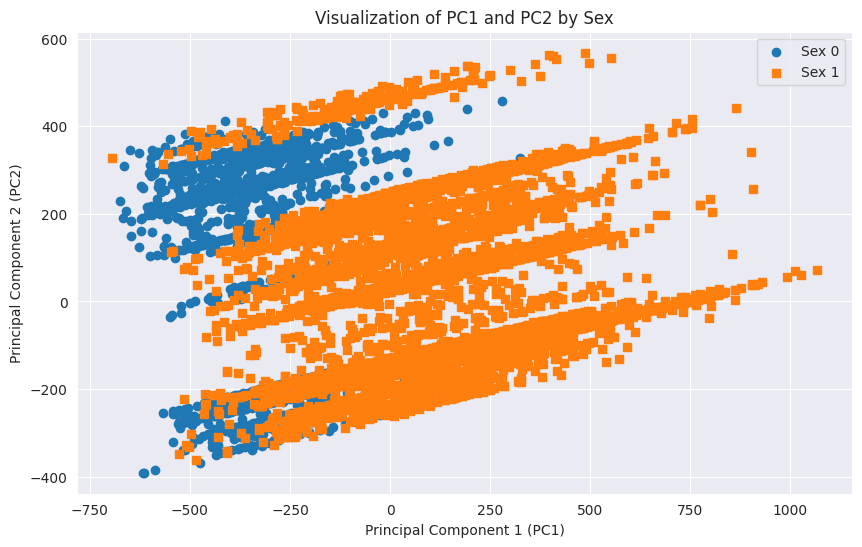

In [31]:

X = df.drop('Sex', axis=1)  # Features
y = df['Sex']  # Target

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a new DataFrame for the reduced dimensions
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
# Concatenate the reduced dimensions with the target (Sex)
pca_df['Sex'] = y.reset_index(drop=True)


# Plot the reduced dimensions
plt.figure(figsize=(10, 6))
markers = {0: 'o', 1: 's'}

# Plot each "Sex" category with a different marker
for sex, marker in markers.items():
    subset_df = pca_df[pca_df['Sex'] == sex]
    plt.scatter(subset_df['PC1'], subset_df['PC2'], label=f'Sex {sex}', marker=marker)

plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()
plt.title('Visualization of PC1 and PC2 by Sex')
plt.show()

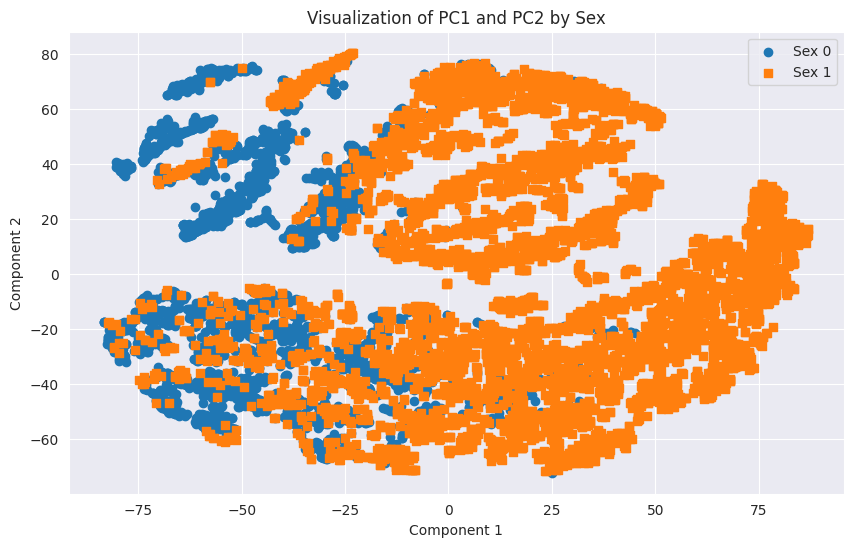

In [38]:
X = df.drop('Sex', axis=1)  # Features
y = df['Sex']  # Target

# Initialize t-SNE with 2 components
tsne = TSNE(n_components=2, random_state=42)

# Fit t-SNE to the features and transform them to 2 dimensions
X_tsne = tsne.fit_transform(X)

# Create a new DataFrame for the reduced dimensions
tsne_df = pd.DataFrame(data=X_tsne, columns=['Component 1', 'Component 2'])

tsne_df['Sex'] = y.reset_index(drop=True)

plt.figure(figsize=(10, 6))
for sex, marker in markers.items():
    subset_df = tsne_df[tsne_df['Sex'] == sex]
    plt.scatter(subset_df['Component 1'], subset_df['Component 2'], label=f'Sex {sex}', marker=marker)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.title('Visualization of PC1 and PC2 by Sex')
plt.show()

/home/c1l1r/programming/def_pyton_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


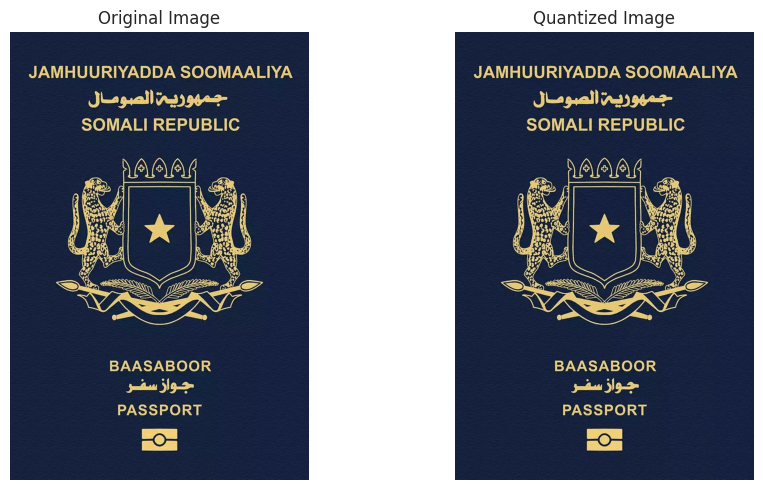

/home/c1l1r/programming/def_pyton_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


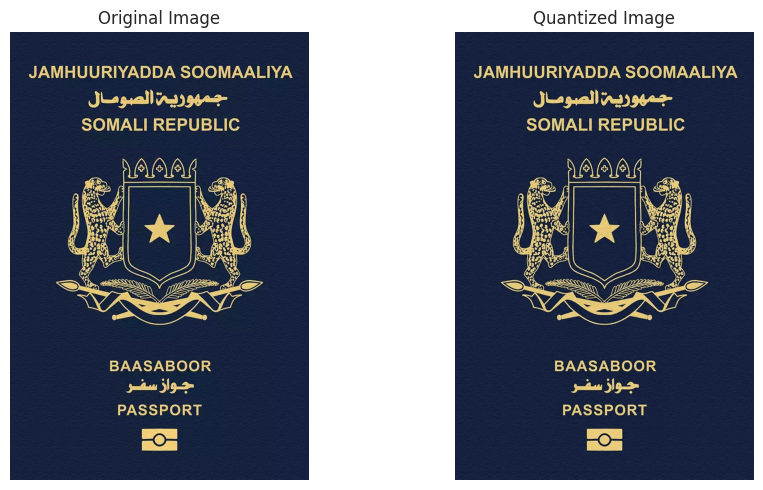

/home/c1l1r/programming/def_pyton_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


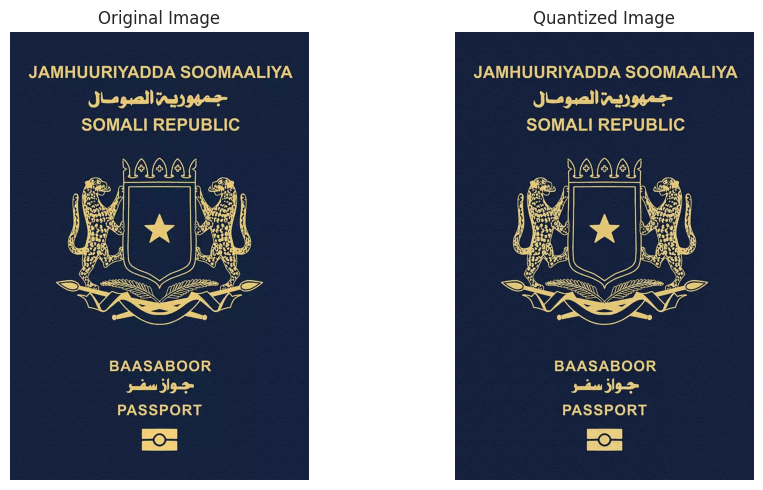

/home/c1l1r/programming/def_pyton_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


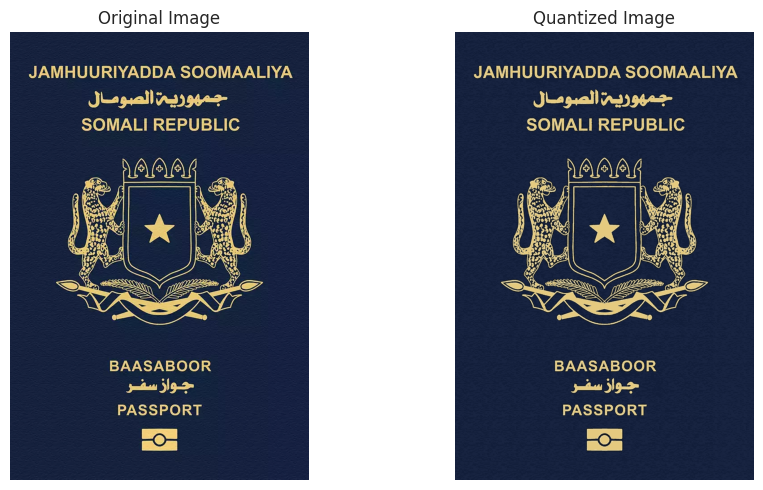

/home/c1l1r/programming/def_pyton_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


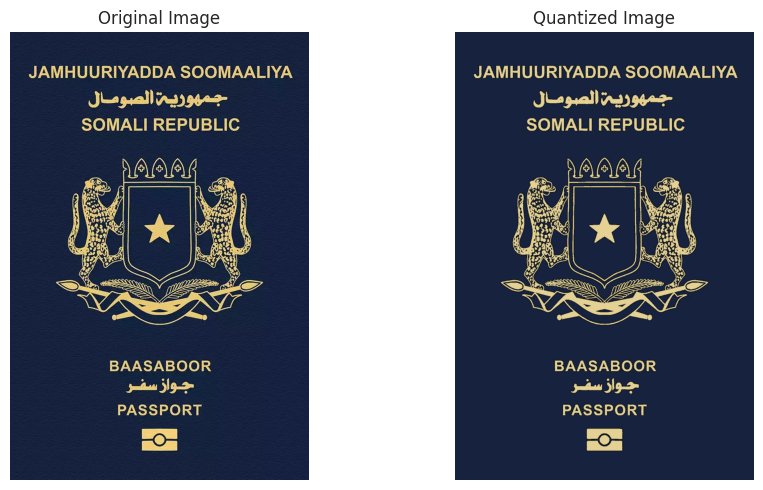

/home/c1l1r/programming/def_pyton_env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


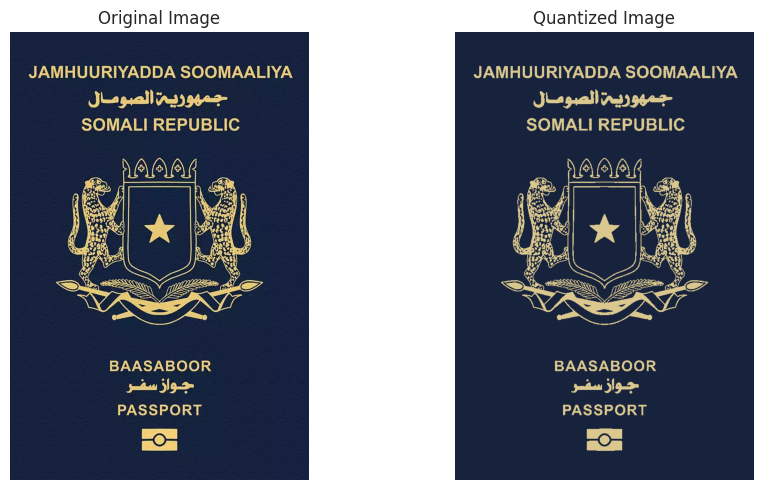

In [6]:
image_path = "Somalia.webp"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Reshape the image to be a list of pixels
pixels = image.reshape(-1, 3)

# Number of clusters (desired number of colors after quantization)
for num_clusters in [64, 32, 16, 8, 4, 2]:

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(pixels)
    quantized_colors = kmeans.cluster_centers_.astype(int)
    labels = kmeans.labels_

    # Replace each pixel with the nearest cluster center
    quantized_pixels = quantized_colors[labels]

    # Reshape the quantized image to its original shape
    quantized_image = quantized_pixels.reshape(image.shape)

    # Display the original and quantized images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(quantized_image)
    plt.title('Quantized Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [34]:
true = pd.read_csv('True.csv')
fake = pd.read_csv('Fake.csv')
true['category'] = 1
fake['category'] = 0
df = pd.concat([true, fake])
df = df.sample(frac = 0.3)
df['text'] = df['title'] + " " + df['text']
df =  df.drop(['title', 'date', 'subject'], axis =1,  inplace = False)
df.drop_duplicates(inplace = True)
df

text  category
21328  WATCH #BlackLivesMatter Students Panic When As...         0
20361  WATCH TREY GOWDY Crush The Lying Media During ...         0
5980   Trump tells Republican lawmakers: Enough talk....         1
2777    WATCH: Actors At SAG Awards BLAST Trump’s Mus...         0
6646   With water cannons and Southern belles, Trump ...         1
...                                                  ...       ...
15337  (VIDEO) DONALD TRUMP’S MESSAGE TO THE BLACK LI...         0
11145  Atlantic City, N.J., to hold emergency meeting...         1
11703  Turkey says U.S. isolated on Jerusalem, issuin...         1
18579  CNN’S DON LEMON Tries to Blame Trump…Cuts Off ...         0
9916   Wow! Hillary Clinton Wants New York, Florida a...         0

[12919 rows x 2 columns]

In [41]:
def cleaning(text):
    text = text.lower()  # Convert text to lower case
    text = re.sub('\[[^]]*\]', '', text) #Remove between square brackets text
    text =  re.sub(r'http\S+', '', text) # Removing URL's
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation marks
    text = nltk.word_tokenize(text)  # Break the text into tokens
    stop_words = set(nltk.corpus.stopwords.words('english'))
    text = [word for word in text if word not in stop_words]  # Remove stop-words
    lemmatizer = nltk.WordNetLemmatizer()
    text = [lemmatizer.lemmatize(word) for word in text]  # lemmatization of the text
    text = " ".join(text)  # Connect the tokens in a line
    return text

In [42]:
t = time()
df['text'] = df['text'].apply(lambda x: cleaning(x))
print('Time to clean up everything: {} mins'.format(round((time() - t) / 60, 2)))

Time to clean up everything: 0.32 mins


Time to show the true cloud: 0.31 mins


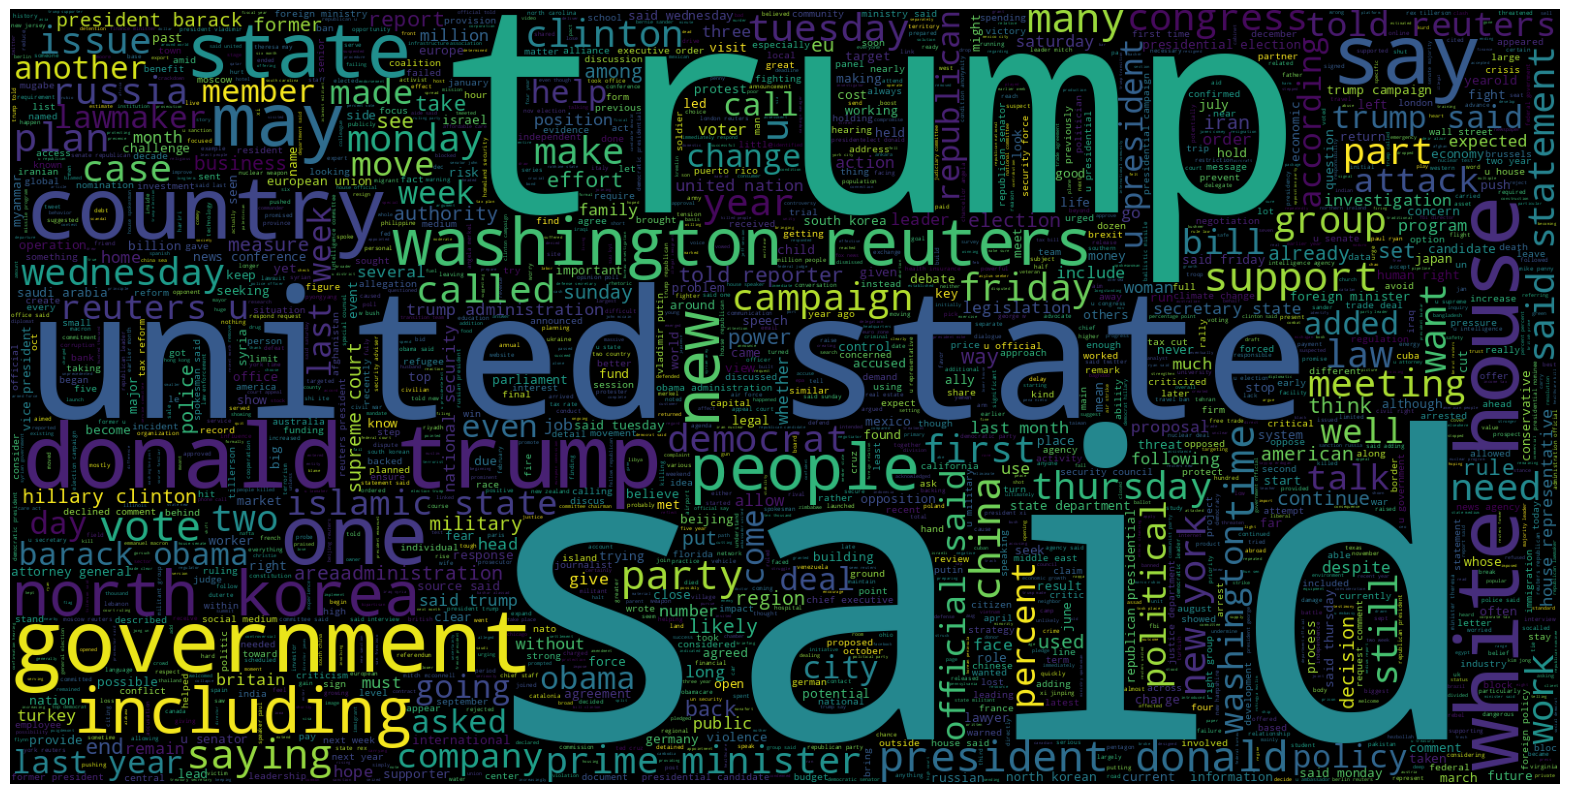

In [43]:
t = time()
# Text that is not Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 1].text))
plt.figure(figsize = (20,20))
plt.axis('off')
plt.imshow(wc)
print('Time to show the true cloud: {} mins'.format(round((time() - t) / 60, 2)))

Time to show the fake cloud: 0.32 mins


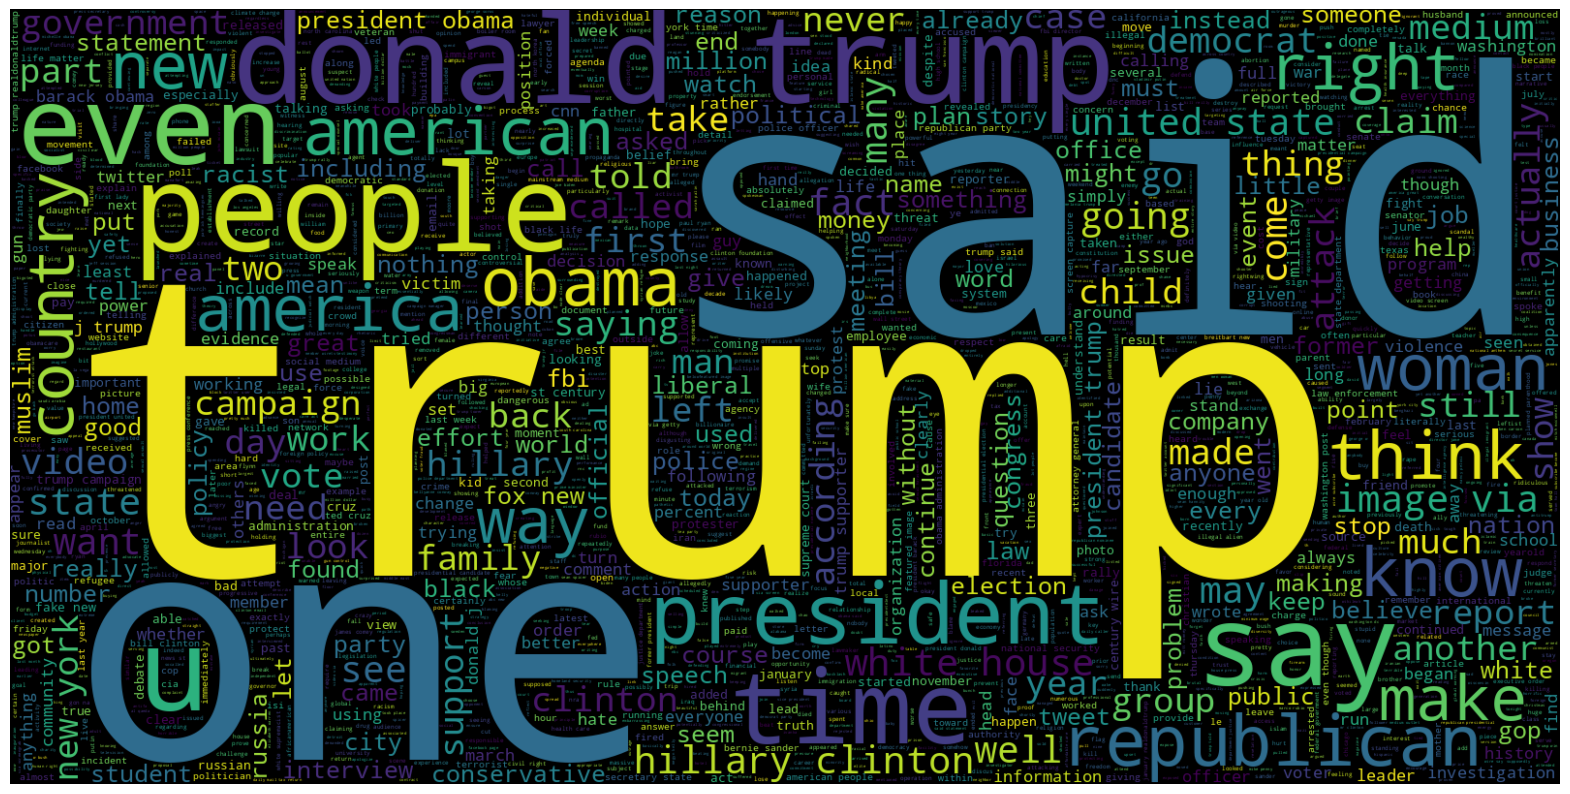

In [44]:
t = time()
plt.figure(figsize = (20,20)) # Text that is Fake
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.category == 0].text))
plt.axis('off')
plt.imshow(wc , interpolation = 'bilinear')
print('Time to show the fake cloud: {} mins'.format(round((time() - t) / 60, 2)))

In [53]:
x_train,x_test,y_train,y_test = train_test_split(df.text,df.category, random_state = 0)
df['text']


21328    watch blacklivesmatter student panic asian stu...
20361    watch trey gowdy crush lying medium benghazi r...
5980     trump tell republican lawmaker enough talk tim...
2777     watch actor sag award blast trump ’ muslim ban...
6646     water cannon southern belle trump end thank to...
                               ...                        
15337    video donald trump ’ message black life matter...
11145    atlantic city nj hold emergency meeting discus...
11703    turkey say u isolated jerusalem issuing threat...
18579    cnn ’ lemon try blame trump…cuts guest ’ agree...
9916     wow hillary clinton want new york florida cali...
Name: text, Length: 12919, dtype: object

In [56]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

clf = LogisticRegression().fit(tfidf_train, y_train)

predicted = clf.predict(tfidf_test)
print(classification_report(y_test, predicted))



              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1626
           1       0.97      0.98      0.97      1604

    accuracy                           0.97      3230
   macro avg       0.97      0.97      0.97      3230
weighted avg       0.97      0.97      0.97      3230
